In [1]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from datetime import date

import matplotlib
import matplotlib.pyplot as plt
from pylab import imshow
import sys, os, os.path, pickle, time

sys.path.append("/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/")
import NASA_core as nc

2024-05-24 13:33:26.848498: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_dir_ = "/Users/hn/Documents/01_research_data/Amin/Joel/"
plot_dir = data_dir_ + "plots/"

os.makedirs(plot_dir, exist_ok=True)

In [30]:
data_2022_nofilter = pd.read_csv(data_dir_ + "data_2022_nofilter.csv")
data_2023_nofilter = pd.read_csv(data_dir_ + "data_2023_nofilter.csv")

print (data_2022_nofilter.shape)
print (data_2023_nofilter.shape)

(76526, 10)
(76016, 10)


In [31]:
data_2022_nofilter.head(2)

,Unnamed: 0,ID,prob_single,Acres,county,CropTyp,DataSrc,Irrigtn,LstSrvD,label
0,0,144261,1.0,2,Spokane,Developed,WSDA,sprinkler,2022/05/04 00:00:00.000,single-cropped
1,1,144262,1.0,2,Spokane,"Fallow, Idle",WSDA,sprinkler,2022/08/05 00:00:00.000,single-cropped


In [32]:
data_2022_nofilter.LstSrvD.max()

'2031/07/23 00:00:00.000'

In [12]:
data_2022_nofilter = pd.read_csv(data_dir_ + "data_2022_nofilter.csv")
data_2022_nofilter["CropTyp"] = data_2022_nofilter["CropTyp"].str.lower()
data_2022_nofilter.drop(columns=["Unnamed: 0"], inplace=True)

### Rename column names: lower case for consistency
data_2022_nofilter.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

##### Sort by id
data_2022_nofilter.sort_values(by=["id"], inplace=True)
data_2022_nofilter.reset_index(drop=True, inplace=True)

data_2022_nofilter.head(2)

,id,prob_single,acres,county,croptyp,datasrc,irrigtn,lstsrvd,label
0,1,1.0,15,Adams,apple,WSDA,drip/micro-sprinkler,2022/09/13 00:00:00.000,single-cropped
1,2,1.0,11,Adams,apple,WSDA,drip/micro-sprinkler,2022/09/13 00:00:00.000,single-cropped


In [14]:
### Convert type of lstsrvd from string to date
data_2022_nofilter.lstsrvd = pd.to_datetime(data_2022_nofilter.lstsrvd)
data_2022_nofilter["last_survey_year"] = data_2022_nofilter.lstsrvd.dt.year
data_2022_nofilter.head(2)

,id,prob_single,acres,county,croptyp,datasrc,irrigtn,lstsrvd,label,last_survey_year
0,1,1.0,15,Adams,apple,WSDA,drip/micro-sprinkler,2022-09-13,single-cropped,2022
1,2,1.0,11,Adams,apple,WSDA,drip/micro-sprinkler,2022-09-13,single-cropped,2022


In [15]:
tick_legend_FontSize = 10

params = {
    "legend.fontsize": tick_legend_FontSize,  # medium, large
    # 'figure.figsize': (6, 4),
    "axes.labelsize": tick_legend_FontSize * 1.2,
    "axes.titlesize": tick_legend_FontSize * 1.3,
    "xtick.labelsize": tick_legend_FontSize,  #  * 0.75
    "ytick.labelsize": tick_legend_FontSize,  #  * 0.75
    "axes.titlepad": 10,
}

plt.rc("font", family="Palatino")
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["ytick.labelleft"] = True
plt.rcParams.update(params)

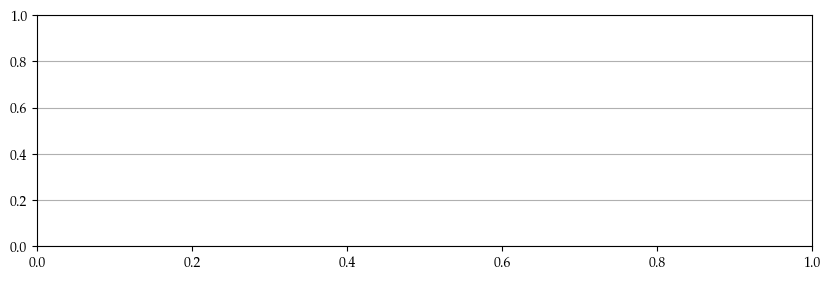

In [23]:
df = data_2022_nofilter.copy()
fig, axs = plt.subplots(1, 1, figsize=(10, 3), sharex=False, gridspec_kw={"hspace": 0.35, "wspace": 0.05})
axs.grid(axis="y", which="both")

LL = len(df["last_survey_year"].unique())
X_axis = np.arange(LL)

bar_width_ = 1
step_size_ = 5 * bar_width_
X_axis = np.array(range(0, step_size_ * LL, step_size_))

# axs.bar(X_axis - bar_width_ * 2, df[["id", "last_survey_year"]], 
#         color="dodgerblue",
#         width=bar_width_)

In [29]:
df[df["last_survey_year"] == df["last_survey_year"].unique().max()]

,id,prob_single,acres,county,croptyp,datasrc,irrigtn,lstsrvd,label,last_survey_year
9137,22077,1.000000,39,Grant,apple,WSDA,drip/micro-sprinkler,2031-07-23,single-cropped,2031
17605,32893,1.000000,35,Grant,apple,WSDA,drip/micro-sprinkler,2031-07-23,single-cropped,2031
17884,34139,0.999994,3,Grant,apple,WSDA,drip/micro-sprinkler,2031-07-23,single-cropped,2031
18545,35200,1.000000,32,Grant,apple,WSDA,drip/micro-sprinkler,2031-07-23,single-cropped,2031
18546,35201,1.000000,1,Grant,apple,WSDA,drip/micro-sprinkler,2031-07-23,single-cropped,2031
18547,35202,0.999999,8,Grant,apple,WSDA,drip/micro-sprinkler,2031-07-23,single-cropped,2031
18548,35203,1.000000,5,Grant,apple,WSDA,drip/micro-sprinkler,2031-07-23,single-cropped,2031
18549,35204,1.000000,16,Grant,apple,WSDA,drip/micro-sprinkler,2031-07-23,single-cropped,2031
